In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

print('X_train_flatten shape: ' + str(x_train_flatten.shape))
print('Y_train shape: ' + str(y_train.shape))
print('X_test_flatten shape: ' + str(x_test_flatten.shape))
print('Y_test shape: ' + str(y_test.shape))

x_train_std = x_train_flatten / 255.
x_test_std = x_test_flatten / 255.

X_train_flatten shape: (60000, 784)
Y_train shape: (60000,)
X_test_flatten shape: (10000, 784)
Y_test shape: (10000,)


In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(x_train_std, y_train, validation_split=0.1, epochs=10, batch_size=1024)

Epoch 1/10
53/53 [==============================] - 2s 40ms/step - loss: 0.6215 - accuracy: 0.8311 - val_loss: 0.2362 - val_accuracy: 0.9365
Epoch 2/10
53/53 [==============================] - 2s 38ms/step - loss: 0.2474 - accuracy: 0.9303 - val_loss: 0.1745 - val_accuracy: 0.9543
Epoch 3/10
53/53 [==============================] - 2s 38ms/step - loss: 0.1865 - accuracy: 0.9483 - val_loss: 0.1414 - val_accuracy: 0.9632
Epoch 4/10
53/53 [==============================] - 2s 37ms/step - loss: 0.1502 - accuracy: 0.9575 - val_loss: 0.1220 - val_accuracy: 0.9665
Epoch 5/10
53/53 [==============================] - 2s 38ms/step - loss: 0.1241 - accuracy: 0.9656 - val_loss: 0.1065 - val_accuracy: 0.9712
Epoch 6/10
53/53 [==============================] - 2s 38ms/step - loss: 0.1038 - accuracy: 0.9708 - val_loss: 0.1018 - val_accuracy: 0.9727
Epoch 7/10
53/53 [==============================] - 2s 38ms/step - loss: 0.0899 - accuracy: 0.9749 - val_loss: 0.0945 - val_accuracy: 0.9740
Epoch 8/10
53

In [8]:
test_loss, test_acc = model.evaluate(x_test_std, y_test)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0844 - accuracy: 0.9743
test_acc:  0.9743000268936157


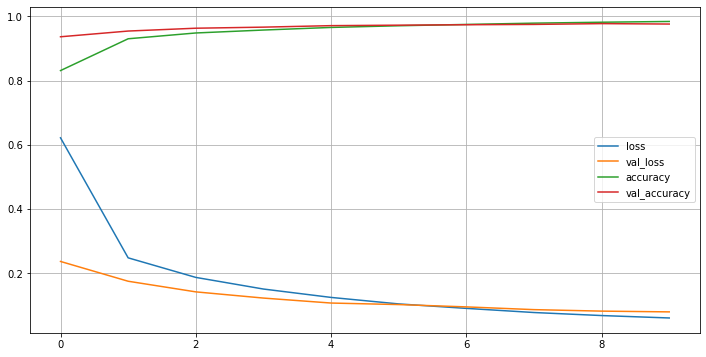

In [9]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

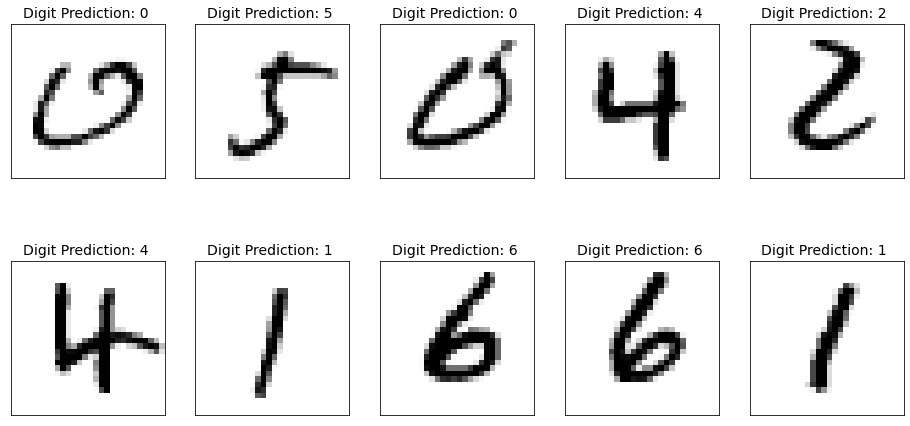

In [10]:
np.random.seed(77)
idxs = np.random.choice(len(y_test), 10, replace=False)
label_to_class = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}

predict = model.predict(x_test_std[idxs])
predict = np.argmax(predict, axis=1)

plt.figure(figsize=(16, 8))
for i, idx in enumerate(idxs):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray_r')
    plt.title('Digit Prediction: {} '.format(label_to_class[predict[i]]), fontsize=14)
    plt.xticks([]); plt.yticks([])

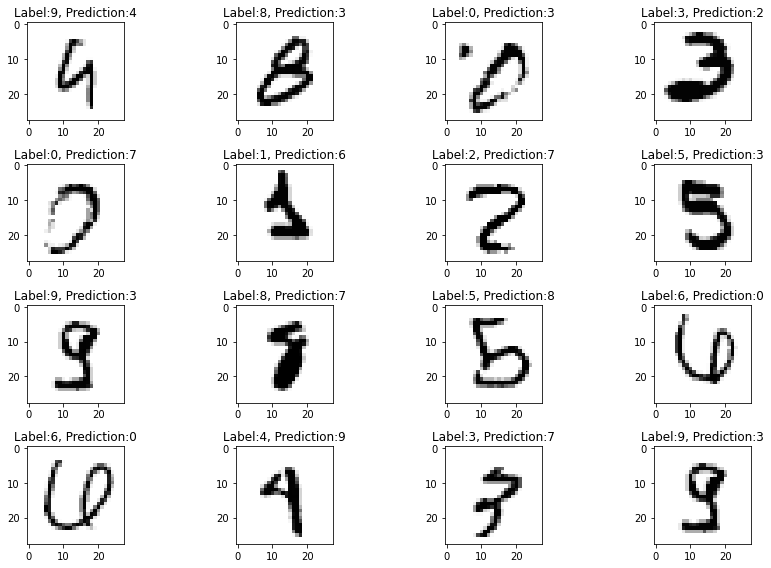

In [11]:
import random

predicted_result = model.predict(x_test_std)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()